In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
with np.load('data/dataDigits.npz') as data:
  X_train = data['x_train']
  y_train = data['y_train']
  X_test = data['x_test']
  y_test = data['y_test']

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

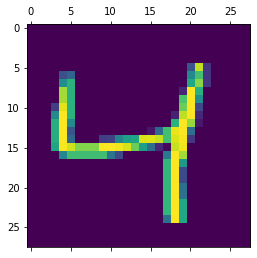

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train_s=X_train/255
X_test_s=X_test/255

In [25]:
X_train_f=X_train_s.reshape(-1,28*28)
X_test_f=X_test_s.reshape(-1,28*28)

In [26]:
X_train_f.shape

(60000, 784)

In [101]:
X_test_f.shape

(10000, 784)

In [33]:
# model=keras.Sequential([
#     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(X_train_f,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 754us/step - loss: 0.4693 - accuracy: 0.8773
Epoch 2/3
1875/1875 [==============================] - 1s 761us/step - loss: 0.3032 - accuracy: 0.9152
Epoch 3/3
1875/1875 [==============================] - 1s 731us/step - loss: 0.2832 - accuracy: 0.9211


In [103]:
# model.evaluate(X_test_f,y_test)

In [104]:
# plt.matshow(X_test[10])

In [105]:
# y_predicted=model.predict(X_test_f)

In [106]:
# y_predicted[0]

In [107]:
# np.argmax(y_predicted[10])

In [108]:
# y_predicted=[np.argmax(i) for i in y_predicted]

In [109]:
# y_predicted[:5]

In [110]:
# y_test[:5]

In [111]:
# cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
# cm

In [112]:
# import seaborn as sn
# plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

In [113]:
# model=keras.Sequential([
#     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(X_train_f,y_train,epochs=10)

In [114]:
# model.evaluate(X_test_f,y_test)

In [115]:
# y_predicted=model.predict(X_test_f)
# y_predicted=[np.argmax(i) for i in y_predicted]
# cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
# cm
# plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

In [116]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3755 - accuracy: 0.8306
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4204 - accuracy: 0.8946
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2968 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2543 - accuracy: 0.9326
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2302 - accuracy: 0.9392


In [117]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 921us/step - loss: 0.2409 - accuracy: 0.9429


[0.24090959131717682, 0.9429000020027161]

In [118]:
# %load_ext tensorboard
# %tensorboard --logdir logs/